In [55]:
import pandas as pd 
from collections import Counter
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [56]:
train_data = '/home/gubh001/ENViSEC/data/processed/IoT-23.csv'
raw_data = '/home/gubh001/ENViSEC/data/raw/IoT-23.csv'
# norm_data = '/home/gubh001/ENViSEC/data/normalized/IoT-23.csv'
norm_data = '/home/gubh001/ENViSEC/data/normalized/IoT-23-no-histry.csv'
processed_data = '/home/gubh001/ENViSEC/data/processed/IoT-23-no-histry.csv'

df_train = pd.read_csv(train_data)
# df_raw = pd.read_csv(raw_data)
# df_norm = pd.read_csv(norm_data)
processed_labels = dict(df_train.multi_label.value_counts())

In [59]:
# df_norm = pd.read_csv(norm_data)
df_process = pd.read_csv(processed_data)

d = dict(Counter(list(df_process.multi_label)))
df_process = df_process[df_process.multi_label.isin([x for x in d if d[x]>1000])].reset_index(drop=True)
X= df_process.iloc[:, :-1].values
y = df_process.iloc[:, -1].values
mean = int(df_process.multi_label.value_counts().mean())
mean

266862

In [54]:
df_test = pd.read_csv('/home/gubh001/ENViSEC/data/processed/IoT-23-cols-30.csv')


Undersampling the majority classes...
	 {'DDoS': 14707, 'PartOfAHorizontalPortScan': 14707}

Oversampling the majority classes...
	 {'Attack': 14707, 'C&C-HeartBeat': 14707, 'C&C': 14707}


<AxesSubplot:>

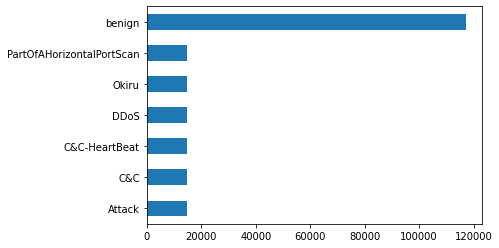

In [74]:
def sampling_strategy(X,y,n_samples, t='majority'):
    # undersample if the majority class is greater than mean value 
    # reference: https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669
    target_classes = ''
    sampling_strategy = {}

    if t == 'majority':
        print('\nUndersampling the majority classes...')
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        print('\nOversampling the majority classes...')
        target_classes = y.value_counts() < n_samples

    tc = target_classes[target_classes == True].index
 
    for target in tc:
        sampling_strategy[target] = n_samples

    # not applying undersampling to 'benign' class
    if 'benign' in sampling_strategy:
        sampling_strategy.pop('benign')  

    print('\t', sampling_strategy)
    return sampling_strategy


def apply_balancer(X, y):
    #     """
    #     apply class balancer(s) to equalize the number of samples into difference labels. 
    #     """
    count = pd.Series(Counter(y))
    n_samples  = count.median().astype(np.int64)

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy(X, pd.Series(y), n_samples, t='majority'))
    X_under, y_under = under_sampler.fit_resample(X, y)

    over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, pd.Series(y_under), n_samples, t='minority'))
    X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)
    return X_bal, y_bal

X_bal, y_bal = apply_balancer(X, y)

pd.Series(Counter(y_bal)).plot.barh()

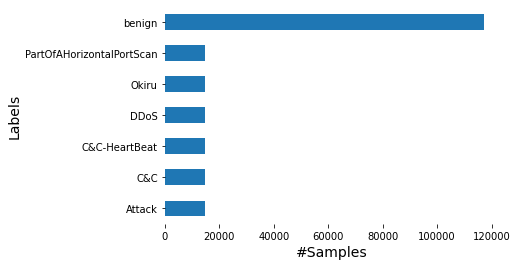

In [83]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize =(6, 4))
ax = pd.Series(Counter(y_bal)).plot.barh(x='#samples', y='labels')
ax.set_ylabel('Labels', fontsize=14)
ax.set_xlabel('#Samples', fontsize=14)
plt.box(False)
plt.show()
fig.savefig('../figures/labels_frequency_balanced-under_over.png', bbox_inches='tight')

In [73]:
count.median().astype(np.int64) * 3

44121

In [3]:
import threading
from urllib.request import urlopen
from src.utility import load_config
from .src/utility import load_config
from threading import Timer, Thread, Event


def get_response(url):
  """
  get the response from the url
  """
  timer = Timer(time_sec, get_response, args=(host_url,)).start()
  feed = urlopen(url)
  print(str(feed.read()))
  

config = load_config('predict.yaml')
host_url = config['host']
time_sec = config['time'] # run itself again after specified seconds
get_response(host_url)


ModuleNotFoundError: No module named 'src'

In [8]:
import ..src

SyntaxError: invalid syntax (399204665.py, line 1)